# <h1 align='center'><font color="red">Fb-Prophet with Multiple📊 Regressors📈</font></h1> 

<font color="pink">Senior Data Scientist.: Dr.Eddy Giusepe Chirinos Isidro</font>

Link de estudo:

* [kaggle: Fb-Prophet](https://www.kaggle.com/code/pythonafroz/fb-prophet-with-multiple-regressors)

* [prophet 1.1.5](https://pypi.org/project/prophet/)

# <font color="gree">Fb-Prophet with Multiple Regressors : For Time Series Analysis of Solar Power Generation</font>

O `Fb-Prophet`, também conhecido como `prophet`, é uma biblioteca de código aberto desenvolvida pelo `Facebook` para previsão de `séries temporais`. Ela foi projetada para ser amigável e eficaz, especialmente para dados com `tendências` e `sazonalidade`. Aqui está o que faz o Prophet se destacar:

* `Facilidade de uso:` 

comparado aos modelos tradicionais de `séries temporais`, o Prophet requer menos configuração manual. Ele pode detectar automaticamente `tendências`, `sazonalidade` (como padrões anuais ou semanais) e feriados em seus dados.

* `Manipulação de sazonalidade:` 

o Prophet é particularmente bom em manipular dados com `fortes efeitos sazonais`. Ele pode capturar padrões sazonais complexos, tornando-o adequado para prever coisas como `vendas no varejo` ou `tráfego de sites`.

* `Efeitos de feriados:` 

você pode incorporar o impacto dos feriados em suas previsões. Isso é útil para situações em que os feriados podem afetar significativamente os dados, como vendas na `Black Friday` ou `no Natal`.

* `Robustez:` 

o Prophet pode manipular pontos de dados ausentes e até mesmo ajustar mudanças inesperadas nas tendências.


`Concluindo, o Fb-Prophet oferece uma maneira poderosa e amigável de fazer previsões de séries temporais, especialmente para dados com tendências, sazonalidade e feriados. No entanto, é sempre uma boa ideia considerar a natureza dos seus dados e explorar outras técnicas, se necessário.`

In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline 

import warnings
warnings.filterwarnings("ignore")



df = pd.read_csv("./Data_Kraljevo.csv")
df.head()

,Datetime,AirTemperature,CloudOpacity,DHI,DNI,EBH,GHI,Production - Kraljevo Location
0,11/22/2022 14:00,6.1,91,68,1.1,1,69,31.246833
1,11/22/2022 15:00,5.9,71,55,4.5,1,56,3.480250
2,11/22/2022 16:00,5.2,100,19,1.5,0,19,0.000000
3,11/22/2022 17:00,5.1,79,0,0.0,0,0,0.000000
4,11/22/2022 18:00,5.0,60,0,0.0,0,0,0.000000


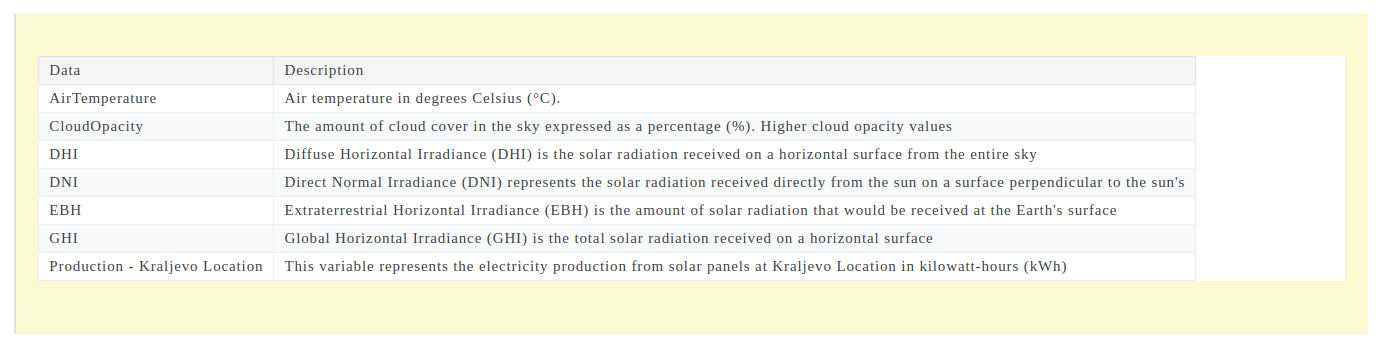

In [2]:
df.shape

(8274, 8)

In [3]:
df.isnull().sum().sum()

0

# <font color="gree">Exploratory Data Analysis</font>

Visualizar séries temporais nos dá uma ideia de `sazonalidade`, `tendência`, etc.

In [4]:
df2 = df[["Datetime","Production - Kraljevo Location"]]

df2['Datetime'] = pd.to_datetime(df2['Datetime'], format='mixed')

df2

,Datetime,Production - Kraljevo Location
0,2022-11-22 14:00:00,31.246833
1,2022-11-22 15:00:00,3.480250
2,2022-11-22 16:00:00,0.000000
3,2022-11-22 17:00:00,0.000000
4,2022-11-22 18:00:00,0.000000
...,...,...
8269,2023-11-02 03:00:00,0.000000
8270,2023-11-02 04:00:00,0.000000
8271,2023-11-02 05:00:00,0.000000
8272,2023-11-02 06:00:00,14.780000


In [19]:
import plotly.express as px

fig = px.line(df2, x="Datetime", y='Production - Kraljevo Location')
fig.update_xaxes(rangeslider_visible=True)
fig.show()